# Importing Libraries

In [1]:
import pyodbc 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pivottablejs import pivot_ui
sns.set()
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

In [2]:
store = pd.read_excel("USA_AHFS_Stores.xlsx",sheet_name='2019')

In [3]:
store.head()

,StoreID,Written,Gross Written,Written Cost,Written GM $,Written GM %,REAC %,Traffic,Tickets,Average Ticket,Close Rate%,SPG,Rest Test,Finance Count,Finance Amount,Finance%,TotalSquareFeet,PSF,EmployeeHours
0,1,9208527.26,9874337.42,4504737.89,4703789.37,0.51,0.07,28000.00,5214.32,1766.01,0.19,328.88,0,3007,6555572.44,0.71,38150,241.38,25105.09
1,2,7031360.40,7525897.59,3580761.47,3450598.93,0.49,0.07,21132.50,4699.48,1496.20,0.22,332.73,0,2855,4949639.82,0.70,49093,143.23,20939.47
2,3,11823638.03,12603066.35,5755898.44,6067739.59,0.51,0.06,35665.00,6967.80,1696.90,0.20,331.52,0,4333,8353021.38,0.71,42554,277.85,29318.24
3,4,8791567.79,9250220.49,4153869.99,4637697.80,0.53,0.05,20830.00,4419.46,1989.29,0.21,422.06,0,2851,6824265.23,0.78,34190,257.14,24102.00
4,6,14762795.61,15468141.68,7111635.47,7651160.14,0.52,0.05,37994.00,8358.15,1766.28,0.22,388.56,0,4661,9971738.92,0.68,37983,388.67,32372.14


In [4]:
# Stripping out spaces from ends of names, and replacing internal spaces with "_"
#print("\nStripping spaces from ends of column names; replacing internal spaces with '_'\n")
store.columns = [col.strip().replace(' ', '_').lower() for col in store.columns]
store.columns = [col.strip().replace('-', '_').lower() for col in store.columns]
store.columns = [col.strip().replace('/', '_').lower() for col in store.columns]

In [5]:
store.head()

,storeid,written,gross_written,written_cost,written_gm_$,written_gm_%,reac_%,traffic,tickets,average_ticket,close_rate%,spg,rest_test,finance_count,finance_amount,finance%,totalsquarefeet,psf,employeehours
0,1,9208527.26,9874337.42,4504737.89,4703789.37,0.51,0.07,28000.00,5214.32,1766.01,0.19,328.88,0,3007,6555572.44,0.71,38150,241.38,25105.09
1,2,7031360.40,7525897.59,3580761.47,3450598.93,0.49,0.07,21132.50,4699.48,1496.20,0.22,332.73,0,2855,4949639.82,0.70,49093,143.23,20939.47
2,3,11823638.03,12603066.35,5755898.44,6067739.59,0.51,0.06,35665.00,6967.80,1696.90,0.20,331.52,0,4333,8353021.38,0.71,42554,277.85,29318.24
3,4,8791567.79,9250220.49,4153869.99,4637697.80,0.53,0.05,20830.00,4419.46,1989.29,0.21,422.06,0,2851,6824265.23,0.78,34190,257.14,24102.00
4,6,14762795.61,15468141.68,7111635.47,7651160.14,0.52,0.05,37994.00,8358.15,1766.28,0.22,388.56,0,4661,9971738.92,0.68,37983,388.67,32372.14


In [6]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   storeid          85 non-null     int64  
 1   written          85 non-null     float64
 2   gross_written    85 non-null     float64
 3   written_cost     85 non-null     float64
 4   written_gm_$     85 non-null     float64
 5   written_gm_%     85 non-null     float64
 6   reac_%           85 non-null     float64
 7   traffic          85 non-null     float64
 8   tickets          85 non-null     float64
 9   average_ticket   85 non-null     float64
 10  close_rate%      85 non-null     float64
 11  spg              85 non-null     float64
 12  rest_test        85 non-null     int64  
 13  finance_count    85 non-null     int64  
 14  finance_amount   85 non-null     float64
 15  finance%         85 non-null     float64
 16  totalsquarefeet  85 non-null     int64  
 17  psf              8

In [7]:
store.describe().T

,count,mean,std,min,25%,50%,75%,max
storeid,85.00,84.08,99.19,1.00,23.00,48.00,72.00,544.00
written,85.00,8659465.61,4497759.98,1334182.64,5624587.66,7632934.33,11369880.10,26863388.43
gross_written,85.00,9086086.44,4730409.97,1411182.82,5724682.22,7984213.12,11920587.03,28347551.48
written_cost,85.00,4252174.86,2161236.62,643790.99,2774349.23,3672622.67,5584164.98,12970167.88
written_gm_$,85.00,4407290.75,2343333.02,690391.65,2807691.74,3909999.44,5710373.64,13893220.55
written_gm_%,85.00,0.51,0.03,0.29,0.50,0.51,0.52,0.54
reac_%,85.00,0.05,0.02,0.00,0.04,0.05,0.05,0.12
traffic,85.00,26503.17,10216.93,5200.00,18731.50,24929.50,34441.00,55314.00
tickets,85.00,5297.10,2322.82,782.90,3825.17,4897.18,6619.63,13728.98
average_ticket,85.00,1598.49,223.11,763.49,1432.11,1642.46,1759.29,1989.29


In [8]:
store.shape

(85, 19)

In [9]:
store.isnull().sum().sort_values(ascending = False)

storeid            0
close_rate%        0
psf                0
totalsquarefeet    0
finance%           0
finance_amount     0
finance_count      0
rest_test          0
spg                0
average_ticket     0
written            0
tickets            0
traffic            0
reac_%             0
written_gm_%       0
written_gm_$       0
written_cost       0
gross_written      0
employeehours      0
dtype: int64

In [10]:
pivot_ui(store)

In [11]:
store.drop(['storeid','rest_test'], axis=1, inplace=True)

C:\Users\MOsman\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


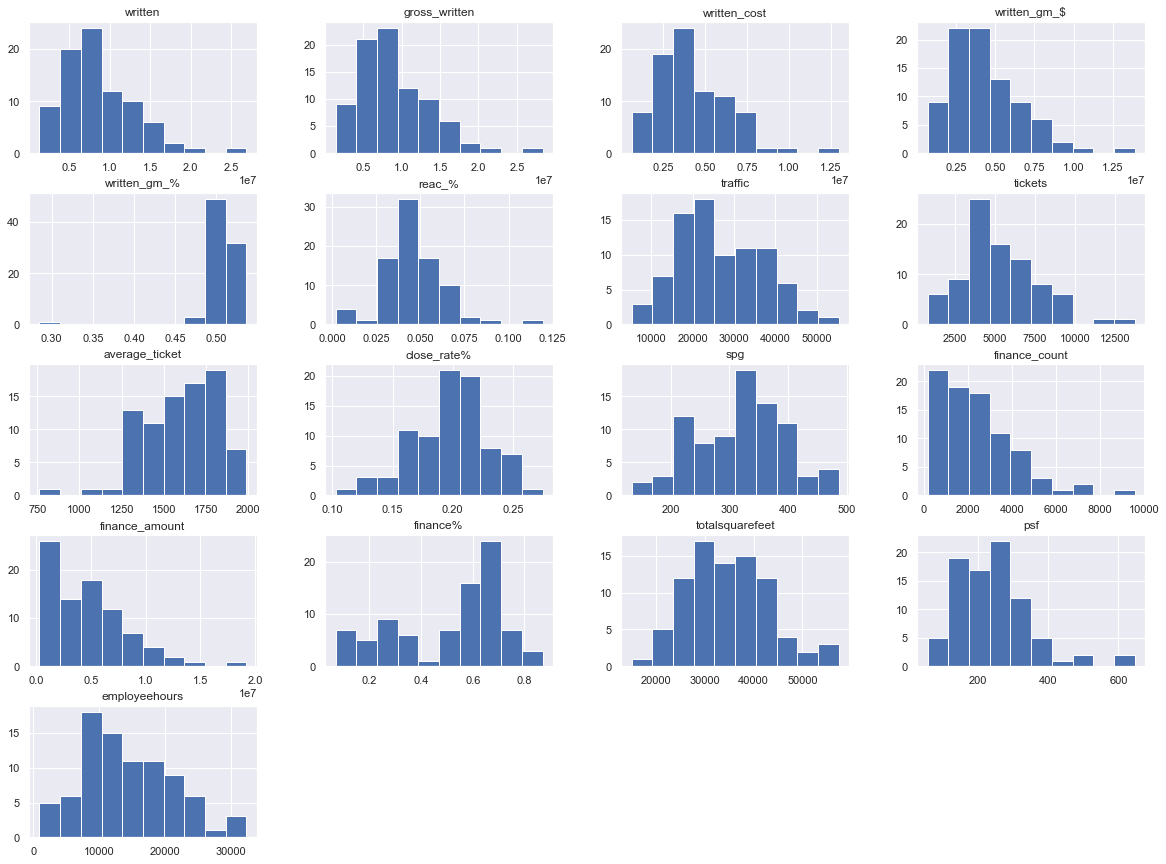

In [12]:
# Visualization of numerical data distribution
store.hist(bins=10, figsize=(20,15))
plt.show()

In [14]:
store.drop(['finance_amount','gross_written','written_cost','written_gm_%','written_gm_$','reac_%'], axis=1, inplace=True)

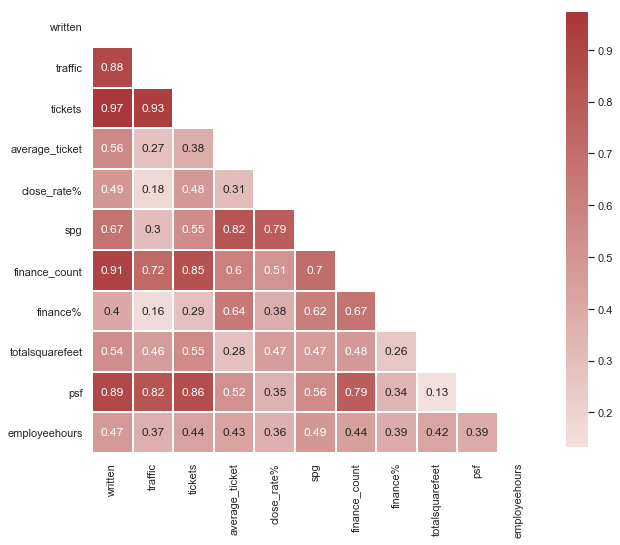

In [15]:
corr = store.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask,  cmap = 'vlag', center = 0, square = True, annot = True, linewidths = .1, cbar_kws = {"shrink": .8})